### 목표
- 붓꽃 꽃잎의 길이/너비, 꽃받침의 길이/너비 특징 4개를 활용하여 품종 3가지를 분류하는 모델을 만들어보자
- 3개 이상의 클래스로 분류 : 다중 분류
- knn 모델의 이웃의 숫자를 조정해보자(k==ne_neighbors, 하이퍼 파라미터 튜닝)

In [257]:
# 클래스가 2개일 경우 분류하는 것 binary => 이진분류

In [258]:
# 환경 셋팅
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# sklearn 제공하는 데이터 셋
from sklearn.datasets import load_iris

# knn
from sklearn.neighbors import KNeighborsClassifier

# 정확도 측정 도구
from sklearn.metrics import accuracy_score

# 훈련 테스트 분류
from sklearn.model_selection import train_test_split

### 데이터 불러오기
- 크기 확인
- 형태 확인
- 내부 정보 확인

In [259]:
# sklearn => datasets : bunch 객체 (데이터의 묶음)
iris_data = load_iris()
iris_data

# 딕셔너리 접근하는 방식과 동일하게 사용가능
# 키값확인

iris_data.keys()

# 'data' : (필수) 문제, 특성 (feature), 속성, 독립 변수, 설명 변수, array() 배열
# 'target' : (필수) 타겟, 라벨, 레이블, label, 종속 변수, 반응 변수, array() 배열
# 'target_names' : (옵션) 레이블 값에 대한 설명(실제 이름), 종속 변수 이름 리스트
# 'feature_names' : (옵션) 특성 이름에 대한 설명, 독립 변수 이름 리스트
# DESCR : Describe() : 기술 통계량, 데이터 크기,데이터 출처


dict_keys(['data', 'target', 'frame', 'target_names', 'DESCR', 'feature_names', 'filename', 'data_module'])

In [260]:
# 문제 데이터 확인
iris_data['data']
iris_data['data'][:5]

array([[5.1, 3.5, 1.4, 0.2],
       [4.9, 3. , 1.4, 0.2],
       [4.7, 3.2, 1.3, 0.2],
       [4.6, 3.1, 1.5, 0.2],
       [5. , 3.6, 1.4, 0.2]])

In [261]:
# 특성 이름, 순서 확인
iris_data['feature_names']

# 'sepal length (cm)' 꽃받침의 길이
# 'sepal width (cm)' 꽃받침의 너비
# 'petal length (cm)' 꽃잎의 길이
# 'petal width (cm)' 꽃잎의 너비

['sepal length (cm)',
 'sepal width (cm)',
 'petal length (cm)',
 'petal width (cm)']

In [262]:
# target 답 데이터 확인
iris_data['target']

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2])

In [263]:
# target 이름 확인
iris_data['target_names']
#'setosa' : 0
#'versicolor' : 1
#'virginica' : 2

array(['setosa', 'versicolor', 'virginica'], dtype='<U10')

In [264]:
# DESCR 정보 확인
print(iris_data['DESCR'])

.. _iris_dataset:

Iris plants dataset
--------------------

**Data Set Characteristics:**

    :Number of Instances: 150 (50 in each of three classes)
    :Number of Attributes: 4 numeric, predictive attributes and the class
    :Attribute Information:
        - sepal length in cm
        - sepal width in cm
        - petal length in cm
        - petal width in cm
        - class:
                - Iris-Setosa
                - Iris-Versicolour
                - Iris-Virginica
                
    :Summary Statistics:

    ============== ==== ==== ======= ===== ====================
                    Min  Max   Mean    SD   Class Correlation
    ============== ==== ==== ======= ===== ====================
    sepal length:   4.3  7.9   5.84   0.83    0.7826
    sepal width:    2.0  4.4   3.05   0.43   -0.4194
    petal length:   1.0  6.9   3.76   1.76    0.9490  (high!)
    petal width:    0.1  2.5   1.20   0.76    0.9565  (high!)
    ============== ==== ==== ======= ===== ===========

### 데이터 셋 구성
- 보기 편한 형식으로 데이터 정리
- 문제와 답 분리
- train과 test로 분리


In [265]:
iris_df = pd.DataFrame(iris_data['data'], columns=iris_data['feature_names'])
iris_df

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2
...,...,...,...,...
145,6.7,3.0,5.2,2.3
146,6.3,2.5,5.0,1.9
147,6.5,3.0,5.2,2.0
148,6.2,3.4,5.4,2.3


In [266]:
X = iris_df
y = iris_data.target

print("문제: ",X.shape, "/ 답 : " ,y.shape)
# X 데이터 - 숫자 형식 데이터 들어있어서 전처리가 필요하지 않음


문제:  (150, 4) / 답 :  (150,)


In [267]:
# train,test 분리
# 1) 행을 랜덤하게 섞음
# 2) 비율에 맞춰 분리

# X- 2개 (X_train, X_test)
# y- 2개 (y_train, y_test) 

# train_test_split(문제, 답, 분리비율, 랜던 고정값)
# test_size => 실수 형태로 숫자값을 입력해야 비율적 의미가 된다
#           => 정수형태로 입력하면 해당 개수 만큼 분리가 된다

# random_state : 데이터를 랜덤하게 섞는 기능의 기준을 고정시키는 값
# 모델 학습에 대한 검증은 다른 방식 진행 해당값이 정답인지 아닌지는 문제 x


X_train,X_test, y_train,y_test = train_test_split(X,y,test_size=0.3, random_state=1,shuffle=True)
X_train.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
118,7.7,2.6,6.9,2.3
18,5.7,3.8,1.7,0.3
4,5.0,3.6,1.4,0.2
45,4.8,3.0,1.4,0.3
59,5.2,2.7,3.9,1.4


In [268]:
print("훈련용 문제 : ",X_train.shape)
print("훈련용 답 : ",y_train.shape)
print("테스트용 문제 : ",X_test.shape)
print("테스트용 답 : ",y_test.shape)


훈련용 문제 :  (105, 4)
훈련용 답 :  (105,)
테스트용 문제 :  (45, 4)
테스트용 답 :  (45,)


In [269]:
# 클래스 별 개수 확인하기
# 데이터의 탐색할 때 train의 값을 보기

# pd => value_counts()

# 7:3 -> 0.34285714, 0.3047619 , 0.35238095
# 7.5:2.5 -> 0.35238095, 0.32380952, 0.39047619
np.bincount(y_train)/105

array([0.34285714, 0.3047619 , 0.35238095])

### EDA : 탐색적 데이터 분석
- 시각화 
- 특성끼리 연관지었을 때 클래스(품종 3개)가 잘 구분 되는지 확인해보기
- 상관관계 확인 - > 그래프 보면서 단순하게 확인

array([[<AxesSubplot: xlabel='sepal length (cm)', ylabel='sepal length (cm)'>,
        <AxesSubplot: xlabel='sepal width (cm)', ylabel='sepal length (cm)'>,
        <AxesSubplot: xlabel='petal length (cm)', ylabel='sepal length (cm)'>,
        <AxesSubplot: xlabel='petal width (cm)', ylabel='sepal length (cm)'>],
       [<AxesSubplot: xlabel='sepal length (cm)', ylabel='sepal width (cm)'>,
        <AxesSubplot: xlabel='sepal width (cm)', ylabel='sepal width (cm)'>,
        <AxesSubplot: xlabel='petal length (cm)', ylabel='sepal width (cm)'>,
        <AxesSubplot: xlabel='petal width (cm)', ylabel='sepal width (cm)'>],
       [<AxesSubplot: xlabel='sepal length (cm)', ylabel='petal length (cm)'>,
        <AxesSubplot: xlabel='sepal width (cm)', ylabel='petal length (cm)'>,
        <AxesSubplot: xlabel='petal length (cm)', ylabel='petal length (cm)'>,
        <AxesSubplot: xlabel='petal width (cm)', ylabel='petal length (cm)'>],
       [<AxesSubplot: xlabel='sepal length (cm)', ylabel='p

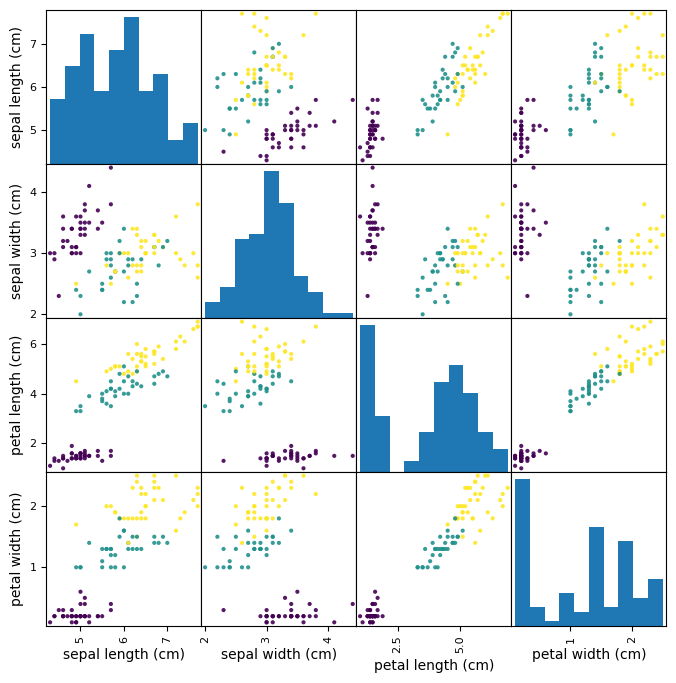

In [275]:
# 산점도 행렬 (scatter matrix) : 한꺼번에 변수 간의 관게를 확인할수 있다.
pd.plotting.scatter_matrix(X_train, figsize=(8,8) ,c=y_train, alpha=0.9)


# c 라벨별로 색 설정
# alpha 투명도 설정
# 같음 품종 색 끼리 잘 뭉처져 있는가?
# 다른 품종끼리 잘 분리되어 있는가?
# 위에 내용이 잘 진행된 특성의 결합은 뭘까?

### 모델링

In [335]:
# 이웃의 개수 5
knn_model = KNeighborsClassifier(n_neighbors=5)
knn_model

KNeighborsClassifier()

In [336]:
# 학습
# fit(훈련용 문제, 훈련용 답)
knn_model.fit(X_train, y_train)

KNeighborsClassifier()

In [337]:
# 예측
pre = knn_model.predict(X_test)
print('-테스트 셋 전체를 이용한 예측 결과 값', pre)
print('-예상되는 품종은? ', iris_data.target_names[pre])

-테스트 셋 전체를 이용한 예측 결과 값 [0 1 1 0 2 1 2 0 0 2 1 0 2 1 1 0 1 1 0 0 1 1 1 0 2 1 0 0 1 2 1 2 1 2 2 0 1
 0 1 2 2 0 1 2 1]
-예상되는 품종은?  ['setosa' 'versicolor' 'versicolor' 'setosa' 'virginica' 'versicolor'
 'virginica' 'setosa' 'setosa' 'virginica' 'versicolor' 'setosa'
 'virginica' 'versicolor' 'versicolor' 'setosa' 'versicolor' 'versicolor'
 'setosa' 'setosa' 'versicolor' 'versicolor' 'versicolor' 'setosa'
 'virginica' 'versicolor' 'setosa' 'setosa' 'versicolor' 'virginica'
 'versicolor' 'virginica' 'versicolor' 'virginica' 'virginica' 'setosa'
 'versicolor' 'setosa' 'versicolor' 'virginica' 'virginica' 'setosa'
 'versicolor' 'virginica' 'versicolor']


In [338]:
# 평가
accuracy_score(y_test, pre)

0.9777777777777777

In [344]:
# 모델 안에 있는 평가 함수 사용해보기
# predict 과정 없이도 모델 정확도 성능 확인 가능
knn_model.score(X_train,y_train)

0.9523809523809523

### 하이퍼 파라미터 튜닝
- 모델의 복잡도 곡선 그려서 확인하기
- 튜닝이 필요한지 판단하기
- 복잡도 제어 : knn -> 이웃의 개수 (n_neighbors)


In [396]:
# train, test 정확도 담는 빈 리스트 
train_acc = []
test_acc = []

# k의 범위 
# X_train.shape => 0 ~ 112개 (25퍼)
n_range = range(1,51)

for i in n_range:
    
    # 모델 생성
    model= KNeighborsClassifier(n_neighbors=i)
    
    # 모델 학습
    model.fit(X_train,y_train)
    
    # train 정확도 -> 리스트 저장
    train_acc.append(model.score(X_train,y_train))
    
    # test 정확도 -> 리스트 저장
    test_acc.append(model.score(X_test,y_test))

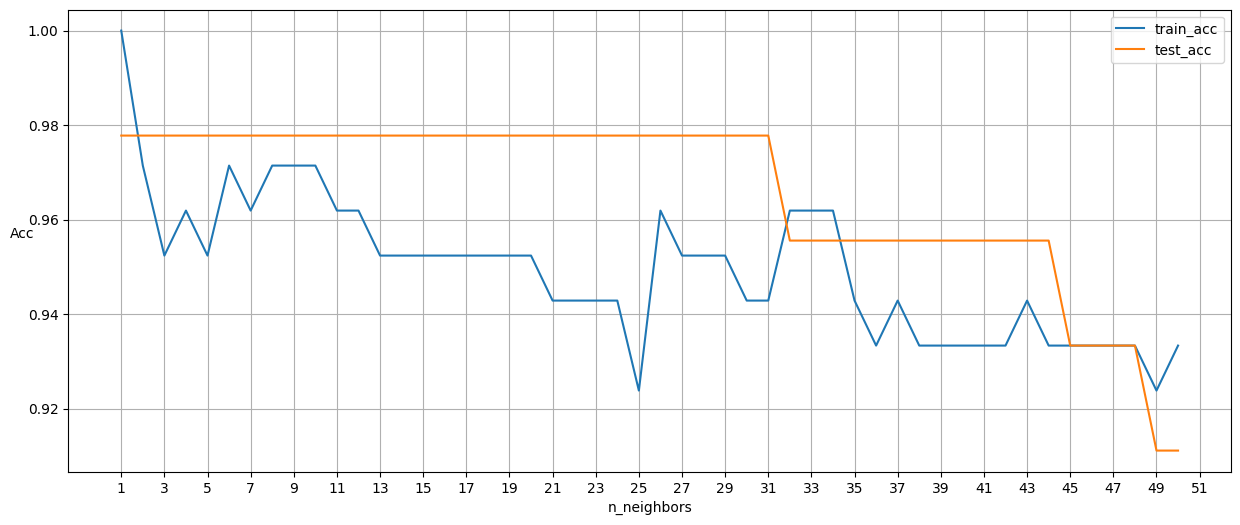

In [399]:
# 선그래프 그리기

plt.figure(figsize=(15,6)) # 그래프 크기 설정
plt.plot(n_range, train_acc, label="train_acc")
plt.plot(n_range, test_acc, label="test_acc")
plt.legend()
plt.xlabel('n_neighbors') # x축 이름 설정
plt.ylabel('Acc', rotation = 0) #y축 이름 설정
plt.xticks(range(1,53,2)) #격자 단위 정리
plt.grid()
plt.show()

In [401]:
# k 값이 커지면 커질수록 train, test 정확도가 떨어지는 상황 -> 과소적합
# k 값이 작아지면 작아질수록 train, test 정확도가 떨어지는 상황 -> 과대적합

# 현재 1일 때는 train, test 둘다 성능이 좋은 상태 -> 과대 적합x
# test가 쉬운 문제들만 담겨있을 수 있음 -> 검증과정은 여러번 해볼 필요가 있다